In [102]:
from datetime import datetime, date

import matplotlib.pyplot as plt
import numpy as np

import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
import yfinance as yfin


In [103]:
start = datetime(2022,1,5)
end = datetime.today()
df_aapl = yfin.download("AAPL",start,end)
df_fb = yfin.download("META",start,end)
df_gold = yfin.download("GLD",start,end)
df_aapl.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300
2025-04-21,193.160004,193.800003,189.809998,193.270004,46742500
2025-04-22,199.740005,201.589996,195.970001,196.119995,52976400
2025-04-23,204.600006,208.000000,202.800003,206.000000,52929200
2025-04-24,208.369995,208.830002,202.940002,204.889999,47199300


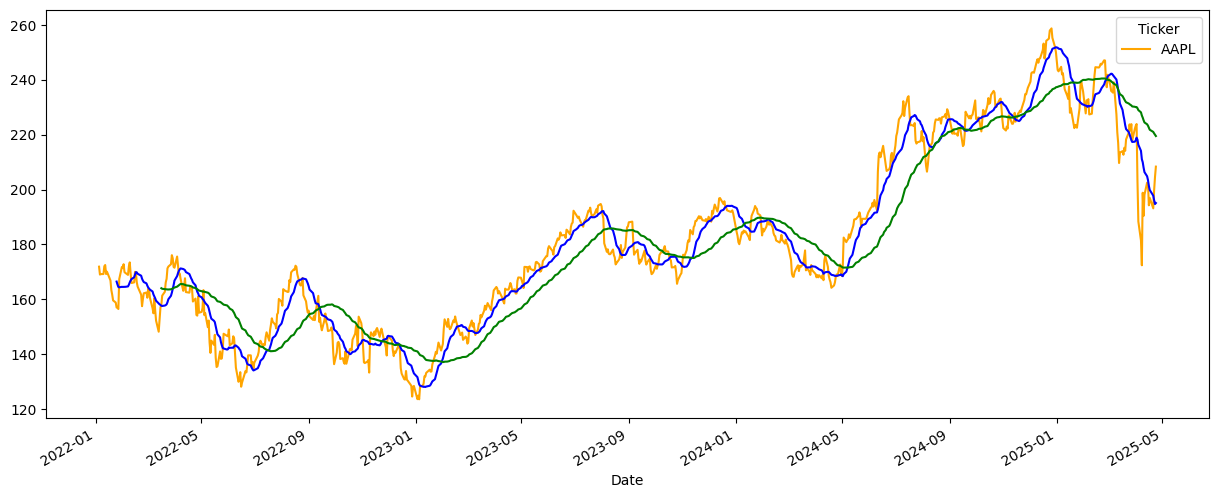

In [104]:
df_aapl['SMA'] = df_aapl['Close'].rolling(window=14).mean()
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()
df_aapl['Close'].plot(figsize=(15,6),color = 'orange')
df_aapl['SMA'].plot(figsize=(15,6),color = 'blue')
df_aapl['SMA50'].plot(figsize=(15,6),color = 'green')
plt.show()



In [105]:
df_aapl['change'] = (((df_aapl['Close'] - df_aapl['Open']))/(df_aapl['Open']) * 100)
df_fb['change'] = (((df_fb['Close'] - df_fb['Open']))/(df_fb['Open']) * 100)
df_gold['change'] = (((df_gold['Close'] - df_gold['Open']))/(df_gold['Open']) * 100)

df_aapl.tail(5).round(2)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2025-04-17,196.98,198.83,194.42,197.20,51334300,199.86,221.81,-0.11
2025-04-21,193.16,193.80,189.81,193.27,46742500,197.79,221.02,-0.06
2025-04-22,199.74,201.59,195.97,196.12,52976400,196.11,220.46,1.85
2025-04-23,204.60,208.00,202.80,206.00,52929200,194.73,220.00,-0.68
2025-04-24,208.37,208.83,202.94,204.89,47199300,195.10,219.52,1.70


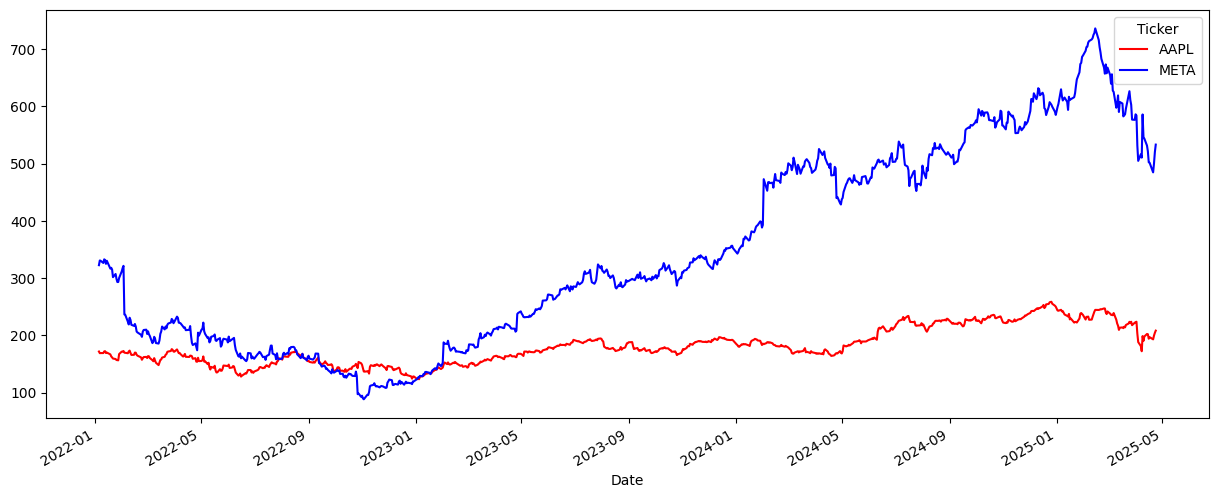

In [106]:
ax = df_aapl['Close'].plot(figsize=(15,6),color= "red")
df_fb['Close'].plot(ax= ax, figsize=(15,6),color= "blue")

plt.show()

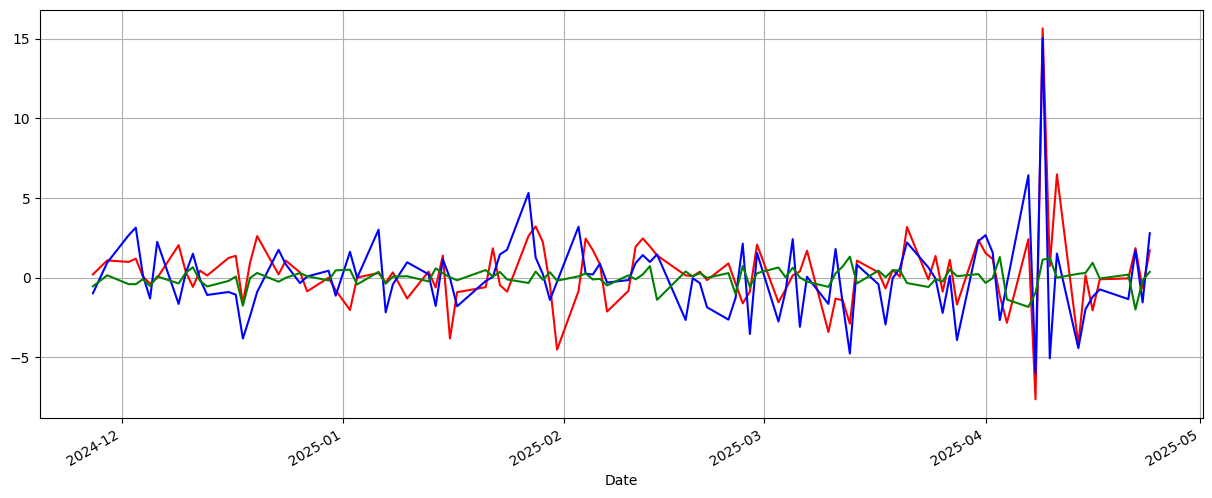

In [107]:
df_aapl['change'].tail(100).plot(grid=True,figsize=(15,6),color = "red")
df_fb['change'].tail(100).plot(grid=True,figsize=(15,6),color = "blue")
df_gold['change'].tail(100).plot(grid=True,figsize=(15,6),color = "green")
plt.show()

In [108]:
df_aapl['label'] = df_aapl['Close'].shift(-30)
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400,241.713572,238.906781,0.379628,196.979996
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600,241.318572,238.603971,1.684321,193.160004
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,240.105000,238.053778,-3.421923,199.740005
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400,238.388572,237.312249,-1.327019,204.600006
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500,236.327857,236.477139,-1.435452,208.369995
2025-03-13,209.679993,216.839996,208.419998,215.949997,61368300,233.765713,235.564553,-2.903452,NaN
2025-03-14,213.490005,213.949997,209.580002,211.250000,60107600,231.364999,234.795892,1.060358,NaN
2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400,229.004999,234.072993,0.323474,NaN


In [109]:
import sklearn.preprocessing


X = np.array(df_aapl.drop(['label','SMA','SMA50'],axis=1))
X = sklearn.preprocessing.scale(X)

predict_data = X[-30:]


In [110]:

X = X[:-30]

In [111]:
y = np.array(df_aapl['label'])
y = y[:-30]

In [112]:
import sklearn.linear_model
import sklearn.model_selection


X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)

model = sklearn.linear_model.LinearRegression()
model.fit(X_train,y_train)

accuracy = model.score(X_test,y_test)
accuracy

0.7507613460156318

In [113]:
predicted_data = model.predict(predict_data)
predicted_data

array([210.81771349, 208.2855875 , 209.54739992, 212.7162357 ,
       215.48175204, 213.97536181, 207.66008357, 217.25698226,
       219.48774301, 221.94137435, 220.34716297, 220.93316847,
       216.38728036, 218.34300413, 221.19190792, 199.84786888,
       190.83765977, 181.61660724, 174.78803005, 176.22816402,
       182.28398034, 189.59946191, 202.90518038, 201.24116962,
       196.58377703, 196.69780912, 191.77181972, 199.38787334,
       204.92617904, 203.63782441])

In [114]:
df_aapl['Predict'] = np.nan
df_aapl.tail(35)

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400,241.713572,238.906781,0.379628,196.979996,NaN
2025-03-07,239.070007,241.369995,234.759995,235.110001,46273600,241.318572,238.603971,1.684321,193.160004,NaN
2025-03-10,227.479996,236.160004,224.220001,235.539993,72071200,240.105000,238.053778,-3.421923,199.740005,NaN
2025-03-11,220.839996,225.839996,217.449997,223.809998,76137400,238.388572,237.312249,-1.327019,204.600006,NaN
2025-03-12,216.979996,221.750000,214.910004,220.139999,62547500,236.327857,236.477139,-1.435452,208.369995,NaN
2025-03-13,209.679993,216.839996,208.419998,215.949997,61368300,233.765713,235.564553,-2.903452,NaN,NaN
2025-03-14,213.490005,213.949997,209.580002,211.250000,60107600,231.364999,234.795892,1.060358,NaN,NaN
2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400,229.004999,234.072993,0.323474,NaN,NaN


In [115]:
last_data = df_aapl.iloc[-1].name

In [116]:
one_day = 86400
next_unix = last_data.timestamp() + one_day


In [118]:
for data in predicted_data:
    next_date = datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df_aapl.loc[next_date] = np.append([np.nan]* (len(df_aapl.columns)-1), data) 


In [119]:
df_aapl.tail()

Price,Close,High,Low,Open,Volume,SMA,SMA50,change,label,Predict
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2025-05-21 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.697809
2025-05-22 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191.771820
2025-05-23 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.387873
2025-05-24 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.926179
2025-05-25 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.637824


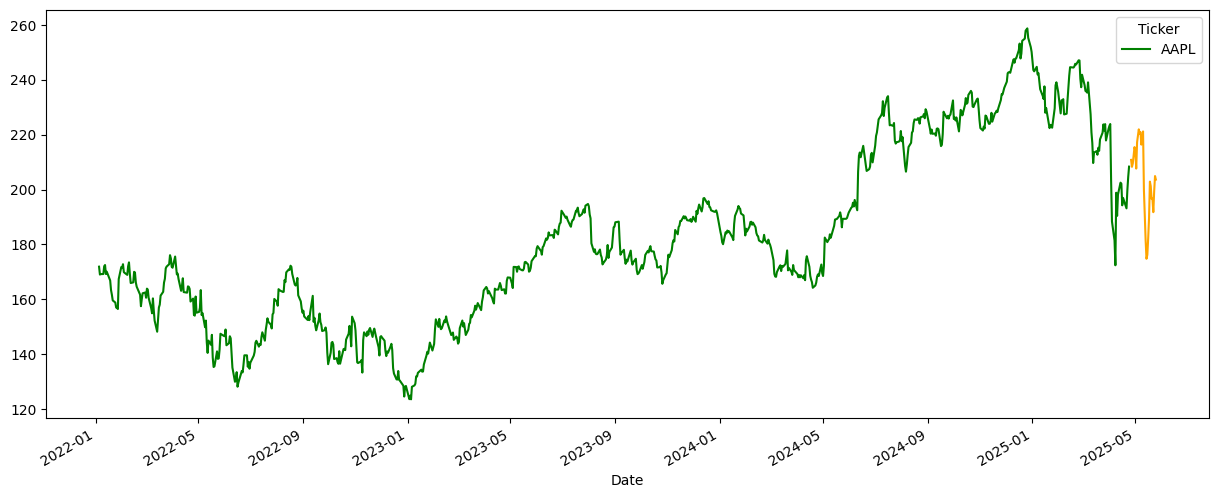

In [120]:
df_aapl['Close'].plot(figsize=(15,6), color='green')
df_aapl['Predict'].plot(figsize=(15,6), color='orange')
plt.show()